# Time series, frequencies, and data visualization
Here, we'll demonstrate how you can use NumPy and Matplotlib to visualize time series in Python.

### By the end of this notebook, you'll be able to:
* Import a Python library and use the functions it contains
* Create NumPy arrays, and execute methods & access attributes of arrays
* Demonstrate how we can add sine waves to create complex waveforms
* Plot time series using Matplotlib
<hr>

## Importing packages
**NumPy** is a useful library that can help store and wrangle homogeneous data. "Homogenous" means that all data points within the data are of the same [data type](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html). In general, you should use this library when you want to do fancy things with lots of numbers, especially if you have matrices or arrays.

Before we can use NumPy, we need to import the package. We can also nickname the modules when we import them. The convention is to import `numpy` as `np`. 

In [1]:
# Import packages
import numpy as np

# Use whos to see available modules
%whos

Variable   Type      Data/Info
------------------------------
np         module    <module 'numpy' from '/us<...>kages/numpy/__init__.py'>


Importing a library is like getting a piece of lab equipment out of a storage locker and setting it up on the bench. Libraries provide additional functionality to the basic Python package, much like a new piece of equipment adds functionality to a lab space. Just like in the lab, importing too many libraries can sometimes complicate and slow down your programs - so we only import what we need for each program.

## Creating NumPy arrays
Once we’ve imported the library, we can create in a few different ways:
* from a Python list or tuples
* by using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, `empty`,`zeroes`, etc.
* reading data from files

## What is an array?
![](https://miro.medium.com/max/1400/1*X0Dg7QfSYtWhSAu-afi8-g.png)

(from [this article](https://towardsdatascience.com/numpy-array-cookbook-generating-and-manipulating-arrays-in-python-2195c3988b09))

In [2]:
# Create a list
lst = [1,2,3,4,5]

# Make our list into an array
my_vector = np.array(lst) # convert list to an array
print(type(my_vector))    # print type of my_vector
print(my_vector)          # print my vector

<class 'numpy.ndarray'>
[1 2 3 4 5]


In [3]:
# If we give numpy a list of lists, it will create a matrix
my_matrix = np.array([lst,lst])
print(my_matrix)

[[1 2 3 4 5]
 [1 2 3 4 5]]


### Benefits of using arrays
In addition to being less clunky & a bit faster than lists of lists, arrays can do a lot of things that lists can't. For example, we can add and multiply them. Alternatively, we can use the `sum` method to sum across a specific axis.

In [4]:
sum_list = [1,3,5] + [3,5,7]
sum_array = np.array([1,3,5]) + np.array([3,5,7])
mult_array = np.array([1,3,5]) * np.array([3,5,7])

print(sum_list)
print(sum_array)
print(mult_array)

[1, 3, 5, 3, 5, 7]
[ 4  8 12]
[ 3 15 35]


### Numpy also includes some very useful array generating functions:

* `arange`: like `range` but gives you a useful numpy array, instead of an interator, and can use more than just integers)
* `linspace` creates an array with given start and end points, and a desired number of points
* `logspace` same as linspace, but in log.
* `random` can create a random list (there are <a href="https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html">many different ways to use this</a>)
* `concatenate` which can concatenate two arrays along an existing axis [<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html">documentation</a>]
* `hstack` and `vstack` which can horizontally or vertically stack arrays

Whenever we call these, we need to use whatever name we imported numpy as (here, `np`).

In [7]:
# Try the functions above
print(np.arange(0,4))
print(np.linspace(0,10,10))

[0 1 2 3]
[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


## Use NumPy to generate simple sine waves

Now that we understand the basics of NumPy, let's generate a sine wave using the `np.sin` function. We'll then generate a second sine wave and add these together to understand what a fourier transform of this data would look like. **Sine waves** are defined by their frequency, ampltitude, and and phase.

In [9]:
sampling_freq = 1024 # sampling frequency
dur = 1 # 1 second of signal
freq = 7 # 7 Hz signal
freq2 = 130 # 130 Hz signal

t = np.arange(0, dur, 1/sampling_freq) # Generate a time vector

sig1 = np.sin(2 * np.pi * freq * t) # Generate a sine wave
sig1 = 2 * sig1; # Increase the power of signal 1

sig2 = np.sin(2 * np.pi * freq2 * t) # Generate another sine wave

In [8]:
np.pi

3.141592653589793

If we want to plot our sine waves, we need another package! We'll use `matplotlib.pyplot` and import it as `plt`.

In [10]:
# Import plotting package here
import matplotlib.pyplot as plt
%whos

Variable        Type       Data/Info
------------------------------------
dur             int        1
freq            int        7
freq2           int        130
lst             list       n=5
mult_array      ndarray    3: 3 elems, type `int64`, 24 bytes
my_matrix       ndarray    2x5: 10 elems, type `int64`, 80 bytes
my_vector       ndarray    5: 5 elems, type `int64`, 40 bytes
np              module     <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt             module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sampling_freq   int        1024
sig1            ndarray    1024: 1024 elems, type `float64`, 8192 bytes
sig2            ndarray    1024: 1024 elems, type `float64`, 8192 bytes
sum_array       ndarray    3: 3 elems, type `int64`, 24 bytes
sum_list        list       n=6
t               ndarray    1024: 1024 elems, type `float64`, 8192 bytes


><b>Task</b>:
> 1. Add the two sine waves together, to create a third signal `combined_signal`.
> 2. Plot this signal using `plt.plot(combined_signal)`.
> 3. Show the plot cleanly with `plt.show()`
    

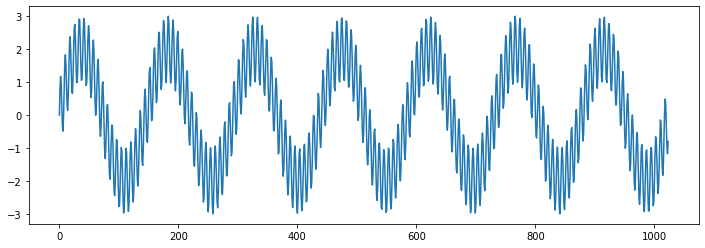

In [21]:
# Add & plot!
combined_signal = sig1 + sig2

fig, ax = plt.subplots(figsize=(12, 4))

plt.plot(combined_signal)

plt.show()

## Import and filter real sleep data

Normal physiological data is never as regular as the data above -- it's usually chock full of lots of different waves, as well as noise. Now that we have a sense of the tools we need, let's work with some real data.

The data we'll import here is a real 30-seconds extract of slow-wave sleep from a young individual, collected by the Walker Lab at UC Berkeley. This data was collected at 100 Hz from channel 'F3'. This sampling frequency is fine for EEG data, but wouldn't be enough for high frequency spiking data. That kind of data is typically sampled at 40 **kilo**Hz.

> **Note**: Here we're using a tool called `urllib.request` to download data that is hosted online. However, when you have data that you'd like to use (as a .txt or .csv file, for example), you can use [`np.loadtxt`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) to load the file into the notebook from your computer.

In [17]:
import urllib.request

# URL of data to download
data_url = 'https://raphaelvallat.com/images/tutorials/bandpower/data.txt'

# Get the data and save it as "sleep_data.txt"
sleep_data, headers = urllib.request.urlretrieve(data_url, './sleep_data.txt')

><b>Task</b>:
> 1. Using the numpy function `loadtxt`, load your text file and assign it to "data". Give `loadtxt` two parameters: `fname` and `delimiter`. This is a comma-delimited file, so delimiter is set to ','.
> 2. Check the shape of your data.

In [20]:
# Load the .txt file
data = np.loadtxt(fname=sleep_data, delimiter=',')
data.shape

(3000,)

First, we'll plot the raw data. The data provides the information about voltage for the y axis. However, we need to also create a time vector, so that we can accurately label the x axis. The `np.arange()` method is very useful for this. We need to create a vector that is the same length as our data, but where each number is in terms of **time**, not **samples**. To do so, we'll divide our vector by the sampling rate.

In [26]:
# Define sampling frequency, num_samples, and time vector
sampling_freq = 100 # sampling frequency, in Hz
time_vector = np.arange(0,30,1/sampling_freq) # the signal is 30 seconds long
time_vector

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 2.997e+01, 2.998e+01,
       2.999e+01])

<font color='blue'><h2>**Breakout Room Tasks**</h2>First, plot the entire 30 seconds of signal! You only need to add a line of code where it says `# ADD CODE HERE`</font>

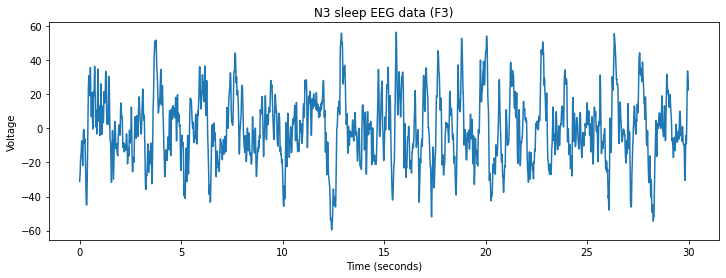

In [27]:
# Plot the signal
fig, ax = plt.subplots(figsize=(12, 4))

# ADD CODE HERE
plt.plot(time_vector,data)

plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.title('N3 sleep EEG data (F3)')
plt.show()

<font color='blue'>Using NumPy slicing, plot **just the first second** of the signal. Remember that this data was sampled at 100 Hz. In other words, there are 100 data points per second.</font>

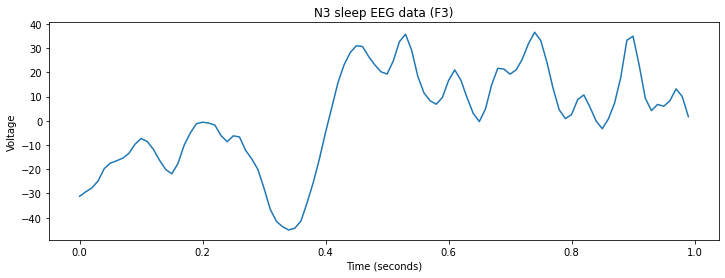

In [28]:
# Plot the first second here
# Plot the signal
fig, ax = plt.subplots(figsize=(12, 4))

# ADD CODE HERE
plt.plot(time_vector[0:100],data[0:100])

plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.title('N3 sleep EEG data (F3)')
plt.show()

## About this notebook

Some of the code in this notebook was adapted from [this tutorial](https://raphaelvallat.com/bandpower.html) by Raphael Vallat, [these tutorials](https://github.com/voytekresearch/Tutorials) from Torben Noto, and _Neural Data Science_ by Pascal Wallisch.